## Polynomial Linear Regression

#### Why is Polynomial Linear Regression "Linear" ?
The answer lies the equation on how polynomial linear regression is implemented. The outcome y is defined as the linear<br> combination of the independent variables. That's the reason it is linear. The outcome has nothing to do with the non- linearities in the independent variables <br>
<br>
Consider the equation : y = b0 + b1x + b2x^2 + b3x^3  --> Only b [coefficients] decides, i'ts linear or polynomial.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = data.iloc[: , 1:2] # it means, select all rows and (1 to n-1) [n = 2] columns
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [4]:
y = data.iloc[: , 2] #se;ect all rows and 2th index [ starts from 0th index ]
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Add Polynomial features using PolynomialFeatures class from sklearn.preprocessing

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree = 2)
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)

poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly_4 = poly_reg_4.fit_transform(X)

In [7]:
X_poly_2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [8]:
X_poly_3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [9]:
X_poly_4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

#### Notice that the first column containing 1 is already added automatically
<br>
<br>
#### Now we can make LinearRegression object using these newly added polynomial features

In [10]:
lin_reg_poly_2 = LinearRegression().fit(X_poly_2, y)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3, y)

lin_reg_poly_4 = LinearRegression().fit(X_poly_4, y)

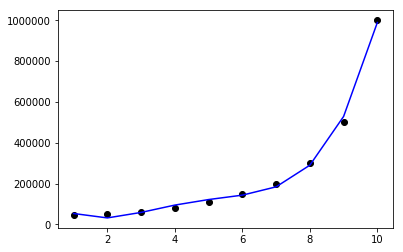

In [11]:
plt.scatter(X, y, color='black')
# plt.plot(X, lin_reg.predict(X), color='b')
# plt.plot(X, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)), color='g')
# plt.plot(X, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)), color='r')

plt.plot(X, lin_reg_poly_4.predict(poly_reg_4.fit_transform(X)), color='b')  # degree 4 perfectly fits the data
plt.show()

### Why Polynomial Regression ?
 * Underfitting - Overfitting
 * Bias vs Variance trade-offs

#### 1. Under-fitting vs Over-fitting
To understand these let's generate some random dataset.<br>

**np.random.normal(m, n, size)**: This is Distribution is also known as Bell Curve because of its characteristics shape. <br>
m: Mean of the distribution. <br>
n: Standard Derivation of the distribution.


[-3.29215704  0.79952837 -0.93621395 -4.7226796  -3.60267397  4.93183364
 -0.85026525  2.45407162  2.30965656  0.76820449  1.56786929 -2.36282052
 -0.28311318  1.63497495  0.6684103   0.99897702 -2.48223722  2.61547479
  1.0607969   4.56228722]


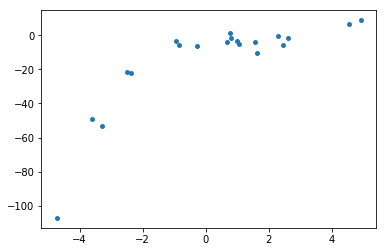

In [39]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
print(x)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=15)
plt.show()

RMSE:  15.908242501429998
R^2 :  0.6386750054827146


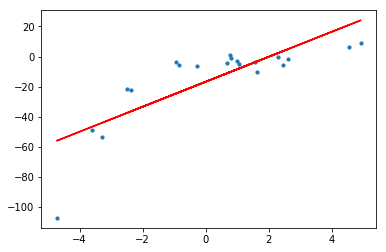

In [40]:
x = x[:, np.newaxis] # convert x into column vector
y = y[:, np.newaxis] # convert x into column vector

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print('RMSE: ', rmse)
print('R^2 : ',r2)

plt.scatter(x, y, s = 10)
plt.plot(x, y_pred, color = 'r')
plt.show()

We can see that the straight line is unable to capture the patterns in the data.This is an example of **under-fitting**.<br>
Computing the RMSE and R²-score of the linear line gives:<br>

* **MSE** = The mean squared error is MSE=1n∑ni=1(yi−y^i)2, the root mean squared error is the square root thus RMSE = root(MSE).
<br>
<br>
* R2=1−SSE/TSS : we can find an interpretation: SSE/TSS is the sum of squared errors divided by the total sum of squares, so it is the fraction ot the total sum of squares that is contained in the error term. So one minus this is the fraction of the total sum of squares that is not in the error, or R2 is the fraction of the total sum of squares that is 'explained by' the regression.

<br>
To overcome under-fitting, we need to increase the complexity of the model.

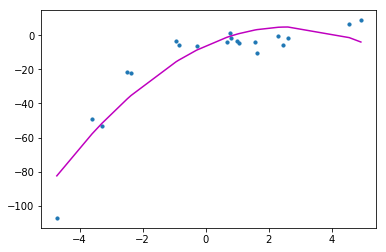

It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line.
Computing the RMSE and R²-score of the quadratic plot gives:

RMSE:  10.120437473614711
R^2 :  0.8537647164420812


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip) # zip() : map the similar index of multiple containers so that they can be used just 
# using as single entity.


plt.plot(x, y_poly_pred, color='m')
plt.show()

print('It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line.')
print('Computing the RMSE and R²-score of the quadratic plot gives:\n')
print('RMSE: ', rmse)
print('R^2 : ',r2)

Note : <br>
##### **We can see that RMSE has decreased and R²-score has increased as compared to the linear line.**
-----------------------------------------------------------------------------------------------------------

**To generate polynomial features (here 2nd degree polynomial)**:<br>
polynomial_features = PolynomialFeatures(degree=2)  
x_poly = polynomial_features.fit_transform(x)

Explaination: <br>
Let's take the first three rows of X: <br>
[[-3.29215704]<br>
 [ 0.79952837]<br>
 [-0.93621395]]<br>
If we apply polynomial transformation of degree 2, the feature vectors become<br>
[[-3.29215704 10.83829796]<br>
 [ 0.79952837  0.63924562]<br>
 [-0.93621395  0.87649656]<br>
 
If we further increase the degree to 20, we can see that the curve passes through more data points. Below is a comparison of curves for degree 3 and 20.<br>
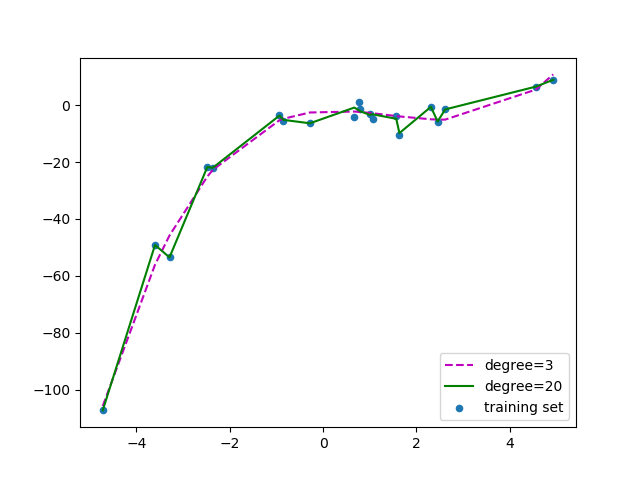

For degree=20, the model is also capturing the noise in the data. This is an example of **over-fitting**. Even though this model passes through most of the data, it will fail to generalize on unseen data.

To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( Note: adding more data can be an issue if the data is itself noise).

How do we choose an optimal model? To answer this question we need to understand the bias vs variance trade-off.

### The Bias vs Variance trade-off
* **Bias** : refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.

* **Variance** : refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.

The picture summarizes all : 
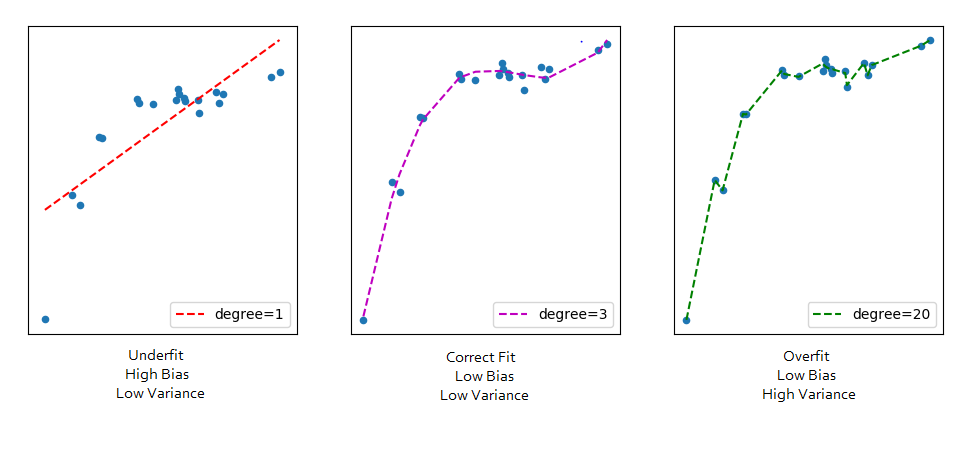

From the below picture we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. 
<br>
Therefore to achieve a good model that performs well both on the train and unseen data, a **trade-off** is made.

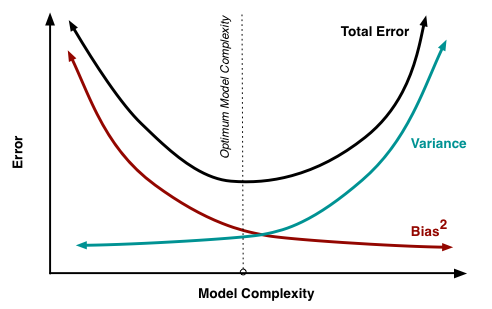